# Written by Jonathan Kastelan and Andrew Nell 
# HW3 Assignment 2


In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os


%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2017")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2017")

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Define function for downloading file from internet and sending to PUIData
"""Function to download file from internet and save in PUIdata"""

def getbikedata(Datestr):
    
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + Datestr + "-citibike-tripdata.zip")
    
    os.system("mv " + Datestr + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
    
    os.system("unzip " + os.getenv("PUIDATA") + "/" + Datestr + "-citibike-tripdata.zip -d " + os.getenv("PUIDATA")) 

# IDEA:
## Subscribers are less likely to travel for 45 minutes than customers

# NULL HYPOTHESIS:
## The ratio of members traveled over 45 minutes as a proportion of total travel is the same as greater than the ratio of customers who traveled over 45 minutes as a percentage of total customers travelled

# _$H_0$_ : $\frac{C_{\mathrm{Over 45}}}{C_{\mathrm{Total}}} <= \frac{S_{\mathrm{Over 45}}}{S_{\mathrm{Total}}}$
# _$H_1$_ : $\frac{C_{\mathrm{Over 45}}}{C_{\mathrm{total}}} > \frac{S_{\mathrm{Over 45}}}{S_{\mathrm{Total}}}$


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [3]:
Datestr = "201612"
getbikedata(Datestr) #Move file 201612 into PUIdata

In [4]:
CitibikeData = pd.read_csv(os.getenv("PUIDATA") + "/" + Datestr + "-citibike-tripdata.csv")

CitibikeData['Over45'] = CitibikeData['Trip Duration']> 45*60
CitibikeData['Over45'] = CitibikeData['Over45'].astype(int)
CitibikeData['Over45'] = CitibikeData['Over45'].replace(0,"Under 45")
CitibikeData['Over45'] = CitibikeData['Over45'].replace(1,"Over 45")

CitibikeData.head(1000)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Over45
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1,Under 45
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1,Under 45
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1,Under 45
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1,Under 45
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1,Under 45
5,483,2016-12-01 00:01:13,2016-12-01 00:09:17,245,Myrtle Ave & St Edwards St,40.693270,-73.977039,372,Franklin Ave & Myrtle Ave,40.694528,-73.958089,16140,Subscriber,1986.0,1,Under 45
6,1114,2016-12-01 00:01:37,2016-12-01 00:20:12,470,W 20 St & 8 Ave,40.743453,-74.000040,453,W 22 St & 8 Ave,40.744751,-73.999154,19997,Subscriber,1964.0,1,Under 45
7,2680,2016-12-01 00:01:50,2016-12-01 00:46:30,3312,1 Ave & E 94 St,40.781721,-73.945940,3325,E 95 St & 3 Ave,40.784903,-73.950503,26105,Subscriber,NaN,0,Under 45
8,1967,2016-12-01 00:01:52,2016-12-01 00:34:40,387,Centre St & Chambers St,40.712733,-74.004607,387,Centre St & Chambers St,40.712733,-74.004607,21348,Customer,NaN,0,Under 45
9,356,2016-12-01 00:01:54,2016-12-01 00:07:50,496,E 16 St & 5 Ave,40.737262,-73.992390,212,W 16 St & The High Line,40.743349,-74.006818,22517,Subscriber,1954.0,1,Under 45


In [5]:
CitibikeData

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Over45
0,528,2016-12-01 00:00:04,2016-12-01 00:08:52,499,Broadway & W 60 St,40.769155,-73.981918,228,E 48 St & 3 Ave,40.754601,-73.971879,26931,Subscriber,1964.0,1,Under 45
1,218,2016-12-01 00:00:28,2016-12-01 00:04:06,3418,Plaza St West & Flatbush Ave,40.675021,-73.971115,3358,Garfield Pl & 8 Ave,40.671198,-73.974841,27122,Subscriber,1955.0,1,Under 45
2,399,2016-12-01 00:00:39,2016-12-01 00:07:19,297,E 15 St & 3 Ave,40.734232,-73.986923,345,W 13 St & 6 Ave,40.736494,-73.997044,19352,Subscriber,1985.0,1,Under 45
3,254,2016-12-01 00:00:44,2016-12-01 00:04:59,405,Washington St & Gansevoort St,40.739323,-74.008119,358,Christopher St & Greenwich St,40.732916,-74.007114,20015,Subscriber,1982.0,1,Under 45
4,1805,2016-12-01 00:00:54,2016-12-01 00:31:00,279,Peck Slip & Front St,40.707873,-74.001670,279,Peck Slip & Front St,40.707873,-74.001670,23148,Subscriber,1989.0,1,Under 45
5,483,2016-12-01 00:01:13,2016-12-01 00:09:17,245,Myrtle Ave & St Edwards St,40.693270,-73.977039,372,Franklin Ave & Myrtle Ave,40.694528,-73.958089,16140,Subscriber,1986.0,1,Under 45
6,1114,2016-12-01 00:01:37,2016-12-01 00:20:12,470,W 20 St & 8 Ave,40.743453,-74.000040,453,W 22 St & 8 Ave,40.744751,-73.999154,19997,Subscriber,1964.0,1,Under 45
7,2680,2016-12-01 00:01:50,2016-12-01 00:46:30,3312,1 Ave & E 94 St,40.781721,-73.945940,3325,E 95 St & 3 Ave,40.784903,-73.950503,26105,Subscriber,NaN,0,Under 45
8,1967,2016-12-01 00:01:52,2016-12-01 00:34:40,387,Centre St & Chambers St,40.712733,-74.004607,387,Centre St & Chambers St,40.712733,-74.004607,21348,Customer,NaN,0,Under 45
9,356,2016-12-01 00:01:54,2016-12-01 00:07:50,496,E 16 St & 5 Ave,40.737262,-73.992390,212,W 16 St & The High Line,40.743349,-74.006818,22517,Subscriber,1954.0,1,Under 45


(0, 100)

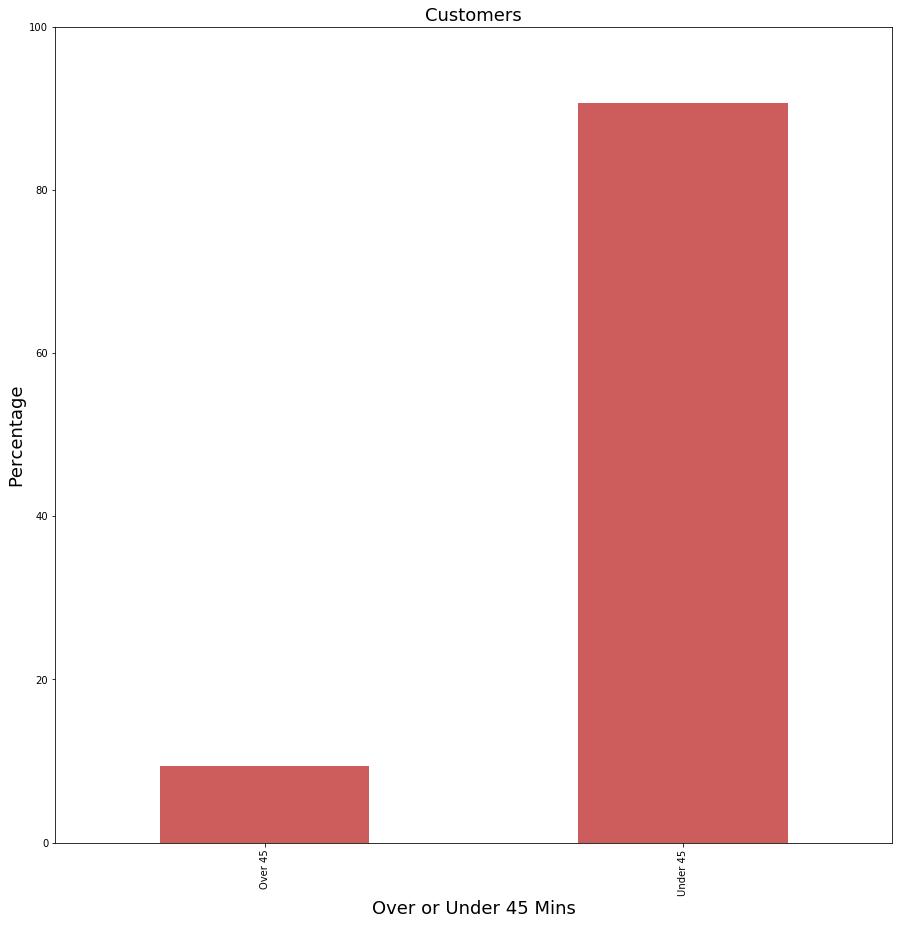

In [ ]:
fig = pl.figure(figsize(15,15))
Customer=CitibikeData['User Type'][CitibikeData['User Type'] == 'Customer'].count()/100
Subscriber=CitibikeData['User Type'][CitibikeData['User Type'] == 'Subscriber'].count()/100

((CitibikeData['User Type'][CitibikeData['User Type'] == "Customer"].groupby([CitibikeData['Over45']]).count())/Customer).plot(kind="bar",color="IndianRed",Label="Yeah",stacked=True)
pl.title('Customers', fontsize = 18)
pl.xlabel('Over or Under 45 Mins', fontsize = 18)
pl.ylabel('Percentage', fontsize = 18)
pl.ylim(0,100)

#Under45 = ((CitibikeData['User Type'][CitibikeData['User Type'] == "Subscriber"].groupby([CitibikeData['Over45']]).count())/Subscriber).plot(kind="bar",color="Blue",Label="Yeah2",alpha=0.5,Stacked=True)

## Figure 1: Customers Percentage Over/Under 45 Minutes
### Note That almost no subscribers travel for further than 45 minutes

In [ ]:
fig = pl.figure(figsize(15,15))
((CitibikeData['User Type'][CitibikeData['User Type'] == "Subscriber"].groupby([CitibikeData['Over45']]).count())/Subscriber).plot(kind="bar",color="IndianRed",Label="Yeah",stacked=True,)
pl.title('Subscribers', fontsize = 18)
pl.xlabel('Over or Under 45 Mins', fontsize = 18)
pl.ylabel('Percentage', fontsize = 18)
pl.ylim(0,100)

(0, 100)

## FIgure 2: Subscribers Percentage Over/Under 45 Minutes
### Note That almost no subscribers travel for further than 45 minutes